-----------

# Simplicity - Full Scale Runner - Ready - 14/12/2022

### The simplicity dimension evaluates how simple the process model is to understand for a human. 

This dimension is therefore not directly related to the observed behavior but can consider the process model solitarily.

### It can be expressed by Occam's razor: "one should not increase, beyond what is necessary, the number of entities required to explain anything".

### Simplicity quantifies the complexity of the model. 

#### Simplicity is measured by comparing the size of the tree with the number of activities in the log. This is based on the observation that the size of a process model is the main factor for perceived complexity and introduction of errors in process models


------------

### To Generate a Range of Simplicity values between two Numbers

-----------

#### Importing Libraries 

In [3]:
import os
import configparser
from datetime import date
import pandas as pd
import re
import graphviz
import math
import seaborn as sns
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
#sns.set(style="darkgrid")

from tqdm import tqdm
from tqdm import trange

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

------

#### Profit Intialization

In [4]:
PATH = 'C:\\Users\\ashis\\Python Notebooks\\ProFIT'# path to ProFIT directory
config = configparser.ConfigParser()
config.add_section("packageLocation")
config.set("packageLocation", "workingDir", PATH)
config.set("packageLocation", "packageDir", PATH+'\\profit')


import sys
sys.path.append(config["packageLocation"]["workingDir"])
sys.path.append(config["packageLocation"]["packageDir"])


from profit import ProcessMap
pm = ProcessMap()

------------

# Simplicity Class

In [5]:
import os
import configparser
from datetime import date
import pandas as pd
import re
import graphviz
import math


PATH = 'C:\\Users\\ashis\\Python Notebooks\\ProFIT'# path to ProFIT directory
config = configparser.ConfigParser()
config.add_section("packageLocation")
config.set("packageLocation", "workingDir", PATH)
config.set("packageLocation", "packageDir", PATH+'\\profit')


import sys
sys.path.append(config["packageLocation"]["workingDir"])
sys.path.append(config["packageLocation"]["packageDir"])


from profit import ProcessMap

pm = ProcessMap()

class Simpleset:
    def __init__(self, IN_DATA, Act_Rate, Path_Rate):
        self.IN_DATA = IN_DATA
        self.Act_Rate = Act_Rate
        self.Path_Rate = Path_Rate
        
    def Filter(self, net):
        temp = str(net)
        temp = temp.lower()
        temp = re.sub("\d",'', temp)
        temp = re.sub('node',' ', temp)
        temp = re.sub('\(', "", temp)
        temp = re.sub('\)', "", temp)
        temp = re.sub('\[', "", temp)
        temp = re.sub('\]', "", temp)
        temp = re.sub('\{', "", temp)
        temp = re.sub('\}', "", temp)
        temp = re.sub('connections',' ', temp)
        temp = re.sub(' ','', temp)
        
        temp = re.sub('\:',' ', temp)
        temp = re.sub('\,',' ', temp)
        temp = re.sub('\'',' ', temp)
        temp = re.sub('\.',' ', temp)
        temp = re.sub(' +', ' ', temp)
        temp = re.sub('"', ' ', temp)
        return temp
    
    
    
    def Final(self, net):
        temp = str(net)
        temp = temp.lower()
        temp = re.sub("\d",'', temp)
        temp = re.sub('node',' ', temp)
        temp = re.sub('\(', "", temp)
        temp = re.sub('\)', "", temp)
        temp = re.sub('\[', "", temp)
        temp = re.sub('\]', "", temp)
        temp = re.sub('\{', "", temp)
        temp = re.sub('\}', "", temp)
        temp = re.sub('connections',' ', temp)
        temp = re.sub(' ','', temp)
        
        temp = re.sub('\:',' ', temp)
        temp = re.sub('\,',' ', temp)
        temp = re.sub('\'',' ', temp)
        temp = re.sub('\.',' ', temp)
        temp = re.sub(' +', ' ', temp)
        temp = re.sub('"', ' ', temp)
        HT = pd.DataFrame([x.split(' ') for x in temp.split('\n')])
        HT = HT.transpose()
        HT = HT.drop([0]).reset_index(drop = True)
        HT.columns = ['Task']
        HT= HT.drop(index=HT.index[-1])
        HT = HT.drop_duplicates(ignore_index=True)
        HT = HT.sort_values("Task").reset_index(drop = True)
        #print(HT)
    
        return HT 
    
    
    def Activites(RAW): 
    
        A = (RAW.IN_DATA).copy()
        A.drop("case_id", inplace=True, axis = 1)
        A.drop("timestamp", inplace=True, axis = 1)
    
        # To be enabled when there are additional fields present in the RAW Event log 
        #A.drop("case_id", inplace=True, axis = 1)
        #A.drop("timestamp", inplace=True, axis = 1)
        
        
        A = A['task'].value_counts() # The Name of the field which contains the names of the Task is supposed to be Subsituted incase it isnt the same 
        
        B = A.to_frame(name="Freq")
        
        B = B.rename_axis("Task").reset_index() # The Name "Task" here should remain the same as it is later utilized for merging of Dataframes
        
        
        # The Function "Filter" is used to make the Activity Labels uniform for both the Process Model & the Initial Event log
        for i in range(len(B)):
            temp_str_var = Obj.Filter(B.iloc[i,0])
            B.iloc[i,0] = temp_str_var
        
        B.drop("Freq", inplace = True, axis = 1)
        
        return (B)
    
    
    def MapGen(Log_DATA):
            
        pm.set_log(data = Log_DATA.IN_DATA)
    
    
        # Have to change "Optimize" State when using Manual Path & Activity Rates
        pm.set_params(optimize=False,aggregate=False) # Optimize = TRUE/FALSE # Agg_type = inner/outer
    
    
        # Will be activated only when "OPTIMIZE" from above is changed to "False"
        pm.set_rates(activity_rate = Log_DATA.Act_Rate, path_rate = Log_DATA.Path_Rate) # Rates = Activity & Path rate only 
    
         # Logic on this (or in % , where 100% means complete utilization & 0% Vice Versa) 
        # Activity Rate = The precision/clarity of the model/graph being produced (i.e. when at 100 = all events are displayed, when at 5-10 low number of events with the most highest weightage are displayed)
        # Path rate = the regulation of paths (i.e. aggregation of path in %)0 = high aggregation of path, 100 % super detailed paths to every case/task
    
        pm.update() # Updates settings
    
        # pm.render() # Renders the Final Process Model
    
        print(pm.get_rates())
    
        net = str(pm.get_graph())
        
        return net
    
    
    def Simple(self, Data):
        
        Temp1 = Obj.Final(Data)
        
        missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
          .drop('_merge', 1).reset_index(drop = True)
        
        Simplicity = 1 - ((0+len(missing))/((len(Temp1)-2)+len(LOG)))
        
        return Simplicity
    
    

---------------

## Data Input

In [6]:
df = pd.read_csv("remote_monitoring_eng.csv") 
df

,case_id,task,timestamp
0,4082,New med. program (operator),2018-01-10 00:00:03
1,4082,Red zone (operator),2018-01-10 22:09:21
2,4173,New med. program (operator),2018-01-12 00:00:04
3,4176,New med. program (operator),2018-01-12 00:00:04
4,4082,Red zone (doctor FD),2018-01-12 02:44:28
...,...,...,...
35606,9155,Notification (operator),2018-12-31 09:03:14
35607,9362,Notification (operator),2018-12-31 09:03:16
35608,9758,Notification (operator),2018-12-31 09:03:23
35609,9938,Notification (operator),2018-12-31 09:03:26


In [7]:
df1 = df[df['task'] != 'New med program operator']
df1 = df1.reset_index(drop = True)

--------

# Actuation

---------------

### Generalization Calculation - Activity Rate - varied / Path Rate - Constant

In [11]:
Act = []
#Path = []
Simp = []

PATH_THRES = [5,20,40,60,80,100]


for j in trange(len(PATH_THRES)):
    
    # Reinitialization
    
    Act = []
    #Path = []
    Simp = []
    
    for i in trange(0,101,1):
        
        print("\n\n Rate of Activity = ", i," \n Rate of Path = ", PATH_THRES[j])
        Obj = Simpleset(df1, i, PATH_THRES[j]) # Creating Object for the ClSAs # ACTIVITY (0-100), PATH (5,20,40,60,80,100) Const
    
        LOG = Obj.Activites() # Initiating the first Function
        
        Simp_Final = Obj.MapGen() # Process Map
        
        Simp_Rate = Obj.Simple(Simp_Final)
        
        #print("\n\n The Simplicity Rating for this Model = ", Gen_Final)
        #print("\n                         Or in Percentile = ", Gen_Final*100," % \n")
    
        Act.append(i)
        #Path.append(i)
        Simp.append(Simp_Rate*100)
        
        print("Simplicity = ", Simp_Rate*100)
        print("----------------------------------------------------NEXT-------------------------------------------------")
        
    print("----------------------------------------------------DONE-------------------------------------------------")
    
    if j == 0:
        res_SA0 = pd.DataFrame({"Path_Rate":Act,"Simplicity":Simp})
        #res_af1
        
    elif j == 1:
        res_SA1 = pd.DataFrame({"Path_Rate":Act,"Simplicity":Simp})
        #res_af1
    
    elif j == 2:
        res_SA2 = pd.DataFrame({"Path_Rate":Act,"Simplicity":Simp})
    
    elif j == 3:
        res_SA3 = pd.DataFrame({"Path_Rate":Act,"Simplicity":Simp})
    
    elif j == 4:
        res_SA4 = pd.DataFrame({"Path_Rate":Act,"Simplicity":Simp})
    
    elif j == 5:
        res_SA5 = pd.DataFrame({"Path_Rate":Act,"Simplicity":Simp})
    
    
ACT_FULL = res_SA0.copy()
ACT_FULL = ACT_FULL.merge(res_SA1, on='Path_Rate', how='right')
ACT_FULL = ACT_FULL.merge(res_SA2, on='Path_Rate', how='right')
ACT_FULL = ACT_FULL.merge(res_SA3, on='Path_Rate', how='right')
ACT_FULL = ACT_FULL.merge(res_SA4, on='Path_Rate', how='right')
ACT_FULL = ACT_FULL.merge(res_SA5, on='Path_Rate', how='right')

ACT_FULL.columns = ['Activity_Rate', 'Path = 5', 'Path = 20' ,'Path = 40', 'Path = 60','Path = 80','Path = 100']

ACT_FULL
        



 Rate of Activity =  0  
 Rate of Path =  5
{'activities': 0, 'paths': 5}
{('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Red zone (doctor FD)', 'end'): (26, 26), ('start', 'Red zone (operator)'): (22, 22), ('Red zone (doctor FD)', 'Red zone (doctor FD)'): (1429, 184)}


 Rate of Activity =  1  
 Rate of Path =  5
{'activities': 1, 'paths': 5}
{('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Red zone (doctor FD)', 'end'): (26, 26), ('start', 'Red zone (operator)'): (22, 22), ('Red zone (doctor FD)', 'Red zone (doctor FD)'): (1429, 184)}


 Rate of Activity =  2  
 Rate of Path =  5
{'activities': 2, 'paths': 5}
{('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Red zone (doctor FD)', 'end'): (26, 26), ('start', 'Red zone (operator)'): (22, 22), ('Red zone

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a

{'activities': 6, 'paths': 5}
{('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('Red zone (doctor FD)', 'Red zone (doctor)'): (674, 148), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor FD)', 'end'): (26, 26), ('start', 'Red zone (operator)'): (22, 22), ('Red zone (doctor FD)', 'Red zone (doctor FD)'): (1429, 184)}


 Rate of Activity =  7  
 Rate of Path =  5
{'activities': 7, 'paths': 5}
{('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('Red zone (doctor FD)', 'Red zone (doctor)'): (674, 148), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor F

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a

{'activities': 13, 'paths': 5}
{('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('New med. program (operator)', 'Red zone (doctor)'): (69, 69), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('Red zone (doctor FD)', 'Red zone (doctor)'): (674, 148), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('start', 'New med. program (operator)'): (241, 241), ('Red zone (doctor FD)', 'end'): (26, 26), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Red zone (doctor FD)', 'Red zone (doctor FD)'): (1429, 184)}


 Rate of Activity =  14  
 Rate of Path =  5
{'activities': 14, 'paths': 5}
{('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (24

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a



 Rate of Activity =  20  
 Rate of Path =  5
{'activities': 20, 'paths': 5}
{('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Notification (operator)', 'Yellow zone (doctor)'): (633, 133), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor FD)', 'Red zone (doctor FD)'): (1429, 184)}


 Rate of Activity =  21  
 Rate of Path =  5
{'activities

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a



 Rate of Activity =  26  
 Rate of Path =  5
{'activities': 26, 'paths': 5}
{('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Notification (operator)', 'Yellow zone (doctor)'): (633, 133), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor FD)', 'Red zone (doctor FD)'): (1429, 184)}


 Rate of Activity =  27  
 Rate of Path =  5
{'activities

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a

{'activities': 32, 'paths': 5}
{('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Notification (operator)', 'Yellow zone (doctor)'): (633, 133), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor FD)', 'Red zone (doctor FD)'): (1429, 184)}


 Rate of Activity =  33  
 Rate of Path =  5
{'activities': 33, 'paths': 5}
{('Red zone (doctor FD)', 'Y

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a



 Rate of Activity =  39  
 Rate of Path =  5
{'activities': 39, 'paths': 5}
{('Meas. missing (operator)', 'Meas. missing (doctor)'): (1466, 157), ('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Notification (operator)', 'Meas. missing (operator)'): (1632, 159), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Meas. missing (doctor)', 'Notification (operator)'): (1058, 128), ('Red zone (doctor FD)', 'Red zone (operat

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a

{'activities': 45, 'paths': 5}
{('Meas. missing (operator)', 'Meas. missing (doctor)'): (1466, 157), ('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Notification (operator)', 'Meas. missing (operator)'): (1632, 159), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Meas. missing (doctor)', 'Notification (operator)'): (1058, 128), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor FD)', 'R

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a



 Rate of Activity =  52  
 Rate of Path =  5
{'activities': 52, 'paths': 5}
{('Meas. missing (operator)', 'Meas. missing (doctor)'): (1466, 157), ('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Notification (operator)', 'Meas. missing (operator)'): (1632, 159), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Meas. missing (doctor)', 'Notification (operator)'): (1058, 128), ('Red zone (doctor FD)', 'Red zone (operat

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a

{'activities': 58, 'paths': 5}
{('Meas. missing (operator)', 'Meas. missing (doctor)'): (1466, 157), ('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Notification (operator)', 'Meas. missing (operator)'): (1632, 159), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Meas. missing (doctor)', 'Notification (operator)'): (1058, 128), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor FD)', 'R

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a

{'activities': 65, 'paths': 5}
{('Meas. missing (operator)', 'Meas. missing (doctor)'): (1466, 157), ('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Notification (operator)', 'Meas. missing (operator)'): (1632, 159), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Meas. missing (doctor)', 'Notification (operator)'): (1058, 128), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor FD)', 'R

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a

{'activities': 72, 'paths': 5}
{('Meas. missing (operator)', 'Meas. missing (doctor)'): (1466, 157), ('Red zone (doctor FD)', 'Yellow zone (doctor)'): (976, 207), ('Red zone (doctor)', 'Red zone (operator)'): (2269, 228), ('Notification (operator)', 'Meas. missing (operator)'): (1632, 159), ('Yellow zone (doctor)', 'Yellow zone (doctor FD)'): (2415, 229), ('Red zone (operator)', 'Red zone (doctor)'): (3672, 251), ('start', 'New med. program (operator)'): (241, 241), ('Yellow zone (doctor FD)', 'Notification (operator)'): (872, 153), ('Red zone (doctor)', 'Red zone (doctor FD)'): (2304, 244), ('Red zone (operator)', 'Red zone (doctor FD)'): (2158, 238), ('Notification (operator)', 'end'): (131, 131), ('Yellow zone (doctor FD)', 'Yellow zone (doctor)'): (1073, 168), ('New med. program (operator)', 'Red zone (operator)'): (171, 171), ('Meas. missing (doctor)', 'Notification (operator)'): (1058, 128), ('Red zone (doctor FD)', 'Red zone (operator)'): (2244, 208), ('Red zone (doctor FD)', 'R

C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_38200\1989063365.py:147: FutureWarning: In a

KeyboardInterrupt: 

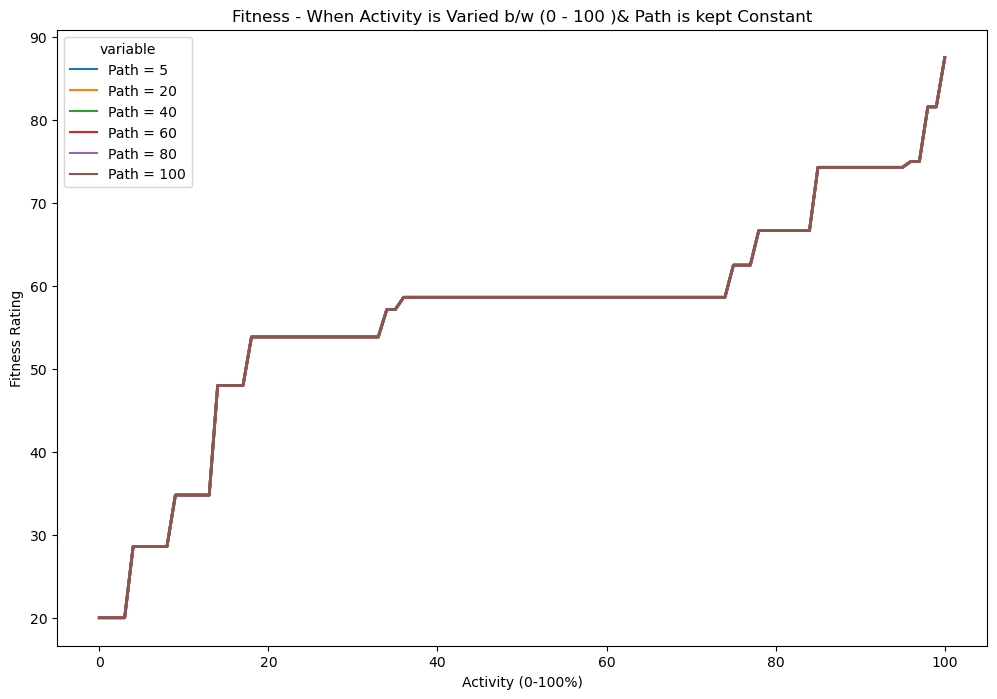

In [14]:
figure(figsize=(12, 8), dpi=100)
sns.lineplot(x='Activity_Rate', y='value', hue='variable', data=pd.melt(ACT_FULL, ['Activity_Rate']), lw = 2)
plt.xlabel("Activity (0-100%)")
plt.ylabel("Fitness Rating")
plt.title("Fitness - When Activity is Varied b/w (0 - 100 )& Path is kept Constant")
plt.show()

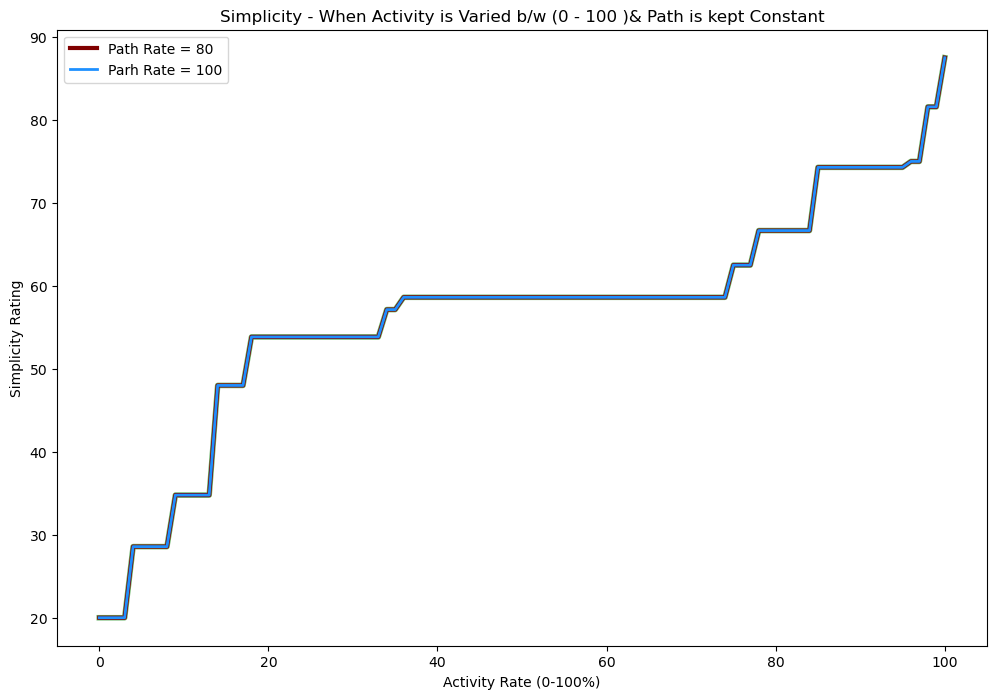

In [15]:
figure(figsize=(12, 8), dpi=100)
sns.lineplot(x='Path_Rate', y='Simplicity', data=res_SA0, lw = 2, color = 'blue')
sns.lineplot(x='Path_Rate', y='Simplicity', data=res_SA1, lw = 2, color = 'yellow')
sns.lineplot(x='Path_Rate', y='Simplicity', data=res_SA2, lw = 4, alpha = 0.6, color = 'green')
sns.lineplot(x='Path_Rate', y='Simplicity', data=res_SA3, lw = 2, alpha = 0.6, color = 'purple')
sns.lineplot(x='Path_Rate', y='Simplicity', data=res_SA4, lw = 3, label = "Path Rate = 80", color = 'maroon')
sns.lineplot(x='Path_Rate', y='Simplicity', data=res_SA5, lw = 2, label = "Parh Rate = 100", color = 'dodgerblue')
#sns.lineplot(x='Activity_Rate', y='value', hue='variable', data=pd.melt(ACT_FULL, re['Activity_Rate']), lw = 2)
plt.xlabel("Activity Rate (0-100%)")
plt.ylabel("Simplicity Rating")
plt.title("Simplicity - When Activity is Varied b/w (0 - 100 )& Path is kept Constant")
plt.show()

In [ ]:
ACT_FULL.to_csv("Sample_5_Simplicity_ACT.csv")

In [ ]:
figure(figsize=(12, 8), dpi=100)
sns.lineplot(x='Activity_Rate', y='value', hue='variable', data=pd.melt(ACT_FULL, ['Activity_Rate']), lw = 2)
plt.xlabel("Activity (0-100%)")
plt.ylabel("Fitness Rating")
plt.title("Fitness - When Activity is Varied b/w (0 - 100 )& Path is kept Constant")
plt.show()

----------------

### Generalization Calculation - Activity Rate - varied / Path Rate - Constant

In [24]:
#Act = []
Path = []
Simp = []

ACT_THRES = [5,20,40,60,80,100]


for j in trange(len(ACT_THRES)):
    
    # Reinitialization
    
    #Act = []
    Path = []
    Simp = []
    
    for i in trange(0,101,1):
        
        print("\n\n Rate of Activity = ", ACT_THRES[j]," \n Rate of Path = ", i)
        Obj = Simpleset(df1, ACT_THRES[j], i) # Creating Object for the Class # ACTIVITY (0-100), PATH (5,20,40,60,80,100) Const
    
        LOG = Obj.Activites() # Initiating the first Function
        Simp_Final = Obj.MapGen() # Final Gen Value
        
        Simp_Rate = Obj.Simple(Simp_Final)
    
        #print("\n\n The Simplicity Rating for this Model = ", Gen_Final)
        #print("\n                         Or in Percentile = ", Gen_Final*100," % \n")
    
        #Act.append(i)
        Path.append(i)
        Simp.append(Simp_Rate*100)
        print("Simplicity = ", Simp_Rate*100)
        print("----------------------------------------------------NEXT-------------------------------------------------")
        
    print("----------------------------------------------------DONE-------------------------------------------------")
    
    if j == 0:
        res_SP0 = pd.DataFrame({"Activity_rate":Path,"Simplicity":Simp})
        #res_SP1
        
    elif j == 1:
        res_SP1 = pd.DataFrame({"Activity_rate":Path,"Simplicity":Simp})
        #res_SP1
    
    elif j == 2:
        res_SP2 = pd.DataFrame({"Activity_rate":Path,"Simplicity":Simp})
    
    elif j == 3:
        res_SP3 = pd.DataFrame({"Activity_rate":Path,"Simplicity":Simp})
    
    elif j == 4:
        res_SP4 = pd.DataFrame({"Activity_rate":Path,"Simplicity":Simp})
    
    elif j == 5:
        res_SP5 = pd.DataFrame({"Activity_rate":Path,"Simplicity":Simp})
    
    
PATH_FULL = res_SP0.copy()
PATH_FULL = PATH_FULL.merge(res_SP1, on='Activity_rate', how='right')
PATH_FULL = PATH_FULL.merge(res_SP2, on='Activity_rate', how='right')
PATH_FULL = PATH_FULL.merge(res_SP3, on='Activity_rate', how='right')
PATH_FULL = PATH_FULL.merge(res_SP4, on='Activity_rate', how='right')
PATH_FULL = PATH_FULL.merge(res_SP5, on='Activity_rate', how='right')

PATH_FULL.columns = ['Path_Rate', 'Activity = 5', 'Activity = 20' ,'Activity = 40', 'Activity = 60','Activity = 80','Activity = 100']

PATH_FULL
        



 Rate of Activity =  5  
 Rate of Path =  0
{'activities': 5, 'paths': 0}


 Rate of Activity =  5  
 Rate of Path =  1
{'activities': 5, 'paths': 1}


 Rate of Activity =  5  
 Rate of Path =  2
{'activities': 5, 'paths': 2}


 Rate of Activity =  5  
 Rate of Path =  3
{'activities': 5, 'paths': 3}


 Rate of Activity =  5  
 Rate of Path =  4
{'activities': 5, 'paths': 4}


 Rate of Activity =  5  
 Rate of Path =  5
{'activities': 5, 'paths': 5}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  6
{'activities': 5, 'paths': 6}


 Rate of Activity =  5  
 Rate of Path =  7
{'activities': 5, 'paths': 7}


 Rate of Activity =  5  
 Rate of Path =  8
{'activities': 5, 'paths': 8}


 Rate of Activity =  5  
 Rate of Path =  9
{'activities': 5, 'paths': 9}


 Rate of Activity =  5  
 Rate of Path =  10
{'activities': 5, 'paths': 10}


 Rate of Activity =  5  
 Rate of Path =  11
{'activities': 5, 'paths': 11}


 Rate of Activity =  5  
 Rate of Path =  12


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 5, 'paths': 12}


 Rate of Activity =  5  
 Rate of Path =  13
{'activities': 5, 'paths': 13}


 Rate of Activity =  5  
 Rate of Path =  14
{'activities': 5, 'paths': 14}


 Rate of Activity =  5  
 Rate of Path =  15
{'activities': 5, 'paths': 15}


 Rate of Activity =  5  
 Rate of Path =  16
{'activities': 5, 'paths': 16}


 Rate of Activity =  5  
 Rate of Path =  17
{'activities': 5, 'paths': 17}


 Rate of Activity =  5  
 Rate of Path =  18
{'activities': 5, 'paths': 18}


 Rate of Activity =  5  
 Rate of Path =  19


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 5, 'paths': 19}


 Rate of Activity =  5  
 Rate of Path =  20
{'activities': 5, 'paths': 20}


 Rate of Activity =  5  
 Rate of Path =  21
{'activities': 5, 'paths': 21}


 Rate of Activity =  5  
 Rate of Path =  22
{'activities': 5, 'paths': 22}


 Rate of Activity =  5  
 Rate of Path =  23
{'activities': 5, 'paths': 23}


 Rate of Activity =  5  
 Rate of Path =  24
{'activities': 5, 'paths': 24}


 Rate of Activity =  5  
 Rate of Path =  25
{'activities': 5, 'paths': 25}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  26
{'activities': 5, 'paths': 26}


 Rate of Activity =  5  
 Rate of Path =  27
{'activities': 5, 'paths': 27}


 Rate of Activity =  5  
 Rate of Path =  28
{'activities': 5, 'paths': 28}


 Rate of Activity =  5  
 Rate of Path =  29
{'activities': 5, 'paths': 29}


 Rate of Activity =  5  
 Rate of Path =  30
{'activities': 5, 'paths': 30}


 Rate of Activity =  5  
 Rate of Path =  31
{'activities': 5, 'paths': 31}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  32
{'activities': 5, 'paths': 32}


 Rate of Activity =  5  
 Rate of Path =  33
{'activities': 5, 'paths': 33}


 Rate of Activity =  5  
 Rate of Path =  34
{'activities': 5, 'paths': 34}


 Rate of Activity =  5  
 Rate of Path =  35
{'activities': 5, 'paths': 35}


 Rate of Activity =  5  
 Rate of Path =  36
{'activities': 5, 'paths': 36}


 Rate of Activity =  5  
 Rate of Path =  37
{'activities': 5, 'paths': 37}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  38
{'activities': 5, 'paths': 38}


 Rate of Activity =  5  
 Rate of Path =  39
{'activities': 5, 'paths': 39}


 Rate of Activity =  5  
 Rate of Path =  40
{'activities': 5, 'paths': 40}


 Rate of Activity =  5  
 Rate of Path =  41
{'activities': 5, 'paths': 41}


 Rate of Activity =  5  
 Rate of Path =  42
{'activities': 5, 'paths': 42}


 Rate of Activity =  5  
 Rate of Path =  43
{'activities': 5, 'paths': 43}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  44
{'activities': 5, 'paths': 44}


 Rate of Activity =  5  
 Rate of Path =  45
{'activities': 5, 'paths': 45}


 Rate of Activity =  5  
 Rate of Path =  46
{'activities': 5, 'paths': 46}


 Rate of Activity =  5  
 Rate of Path =  47
{'activities': 5, 'paths': 47}


 Rate of Activity =  5  
 Rate of Path =  48
{'activities': 5, 'paths': 48}


 Rate of Activity =  5  
 Rate of Path =  49
{'activities': 5, 'paths': 49}


 Rate of Activity =  5  
 Rate of Path =  50


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 5, 'paths': 50}


 Rate of Activity =  5  
 Rate of Path =  51
{'activities': 5, 'paths': 51}


 Rate of Activity =  5  
 Rate of Path =  52
{'activities': 5, 'paths': 52}


 Rate of Activity =  5  
 Rate of Path =  53
{'activities': 5, 'paths': 53}


 Rate of Activity =  5  
 Rate of Path =  54
{'activities': 5, 'paths': 54}


 Rate of Activity =  5  
 Rate of Path =  55
{'activities': 5, 'paths': 55}


 Rate of Activity =  5  
 Rate of Path =  56
{'activities': 5, 'paths': 56}


 Rate of Activity =  5  
 Rate of Path =  57


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 5, 'paths': 57}


 Rate of Activity =  5  
 Rate of Path =  58
{'activities': 5, 'paths': 58}


 Rate of Activity =  5  
 Rate of Path =  59
{'activities': 5, 'paths': 59}


 Rate of Activity =  5  
 Rate of Path =  60
{'activities': 5, 'paths': 60}


 Rate of Activity =  5  
 Rate of Path =  61
{'activities': 5, 'paths': 61}


 Rate of Activity =  5  
 Rate of Path =  62
{'activities': 5, 'paths': 62}


 Rate of Activity =  5  
 Rate of Path =  63
{'activities': 5, 'paths': 63}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  64
{'activities': 5, 'paths': 64}


 Rate of Activity =  5  
 Rate of Path =  65
{'activities': 5, 'paths': 65}


 Rate of Activity =  5  
 Rate of Path =  66
{'activities': 5, 'paths': 66}


 Rate of Activity =  5  
 Rate of Path =  67
{'activities': 5, 'paths': 67}


 Rate of Activity =  5  
 Rate of Path =  68
{'activities': 5, 'paths': 68}


 Rate of Activity =  5  
 Rate of Path =  69
{'activities': 5, 'paths': 69}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  70
{'activities': 5, 'paths': 70}


 Rate of Activity =  5  
 Rate of Path =  71
{'activities': 5, 'paths': 71}


 Rate of Activity =  5  
 Rate of Path =  72
{'activities': 5, 'paths': 72}


 Rate of Activity =  5  
 Rate of Path =  73
{'activities': 5, 'paths': 73}


 Rate of Activity =  5  
 Rate of Path =  74
{'activities': 5, 'paths': 74}


 Rate of Activity =  5  
 Rate of Path =  75
{'activities': 5, 'paths': 75}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  76
{'activities': 5, 'paths': 76}


 Rate of Activity =  5  
 Rate of Path =  77
{'activities': 5, 'paths': 77}


 Rate of Activity =  5  
 Rate of Path =  78
{'activities': 5, 'paths': 78}


 Rate of Activity =  5  
 Rate of Path =  79
{'activities': 5, 'paths': 79}


 Rate of Activity =  5  
 Rate of Path =  80
{'activities': 5, 'paths': 80}


 Rate of Activity =  5  
 Rate of Path =  81
{'activities': 5, 'paths': 81}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  5  
 Rate of Path =  82
{'activities': 5, 'paths': 82}


 Rate of Activity =  5  
 Rate of Path =  83
{'activities': 5, 'paths': 83}


 Rate of Activity =  5  
 Rate of Path =  84
{'activities': 5, 'paths': 84}


 Rate of Activity =  5  
 Rate of Path =  85
{'activities': 5, 'paths': 85}


 Rate of Activity =  5  
 Rate of Path =  86
{'activities': 5, 'paths': 86}


 Rate of Activity =  5  
 Rate of Path =  87


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 5, 'paths': 87}


 Rate of Activity =  5  
 Rate of Path =  88
{'activities': 5, 'paths': 88}


 Rate of Activity =  5  
 Rate of Path =  89
{'activities': 5, 'paths': 89}


 Rate of Activity =  5  
 Rate of Path =  90
{'activities': 5, 'paths': 90}


 Rate of Activity =  5  
 Rate of Path =  91
{'activities': 5, 'paths': 91}


 Rate of Activity =  5  
 Rate of Path =  92
{'activities': 5, 'paths': 92}


 Rate of Activity =  5  
 Rate of Path =  93


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 5, 'paths': 93}


 Rate of Activity =  5  
 Rate of Path =  94
{'activities': 5, 'paths': 94}


 Rate of Activity =  5  
 Rate of Path =  95
{'activities': 5, 'paths': 95}


 Rate of Activity =  5  
 Rate of Path =  96
{'activities': 5, 'paths': 96}


 Rate of Activity =  5  
 Rate of Path =  97
{'activities': 5, 'paths': 97}


 Rate of Activity =  5  
 Rate of Path =  98
{'activities': 5, 'paths': 98}


 Rate of Activity =  5  
 Rate of Path =  99
{'activities': 5, 'paths': 99}


 Rate of Activity =  5  
 Rate of Path =  100


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 5, 'paths': 100}
----------------------------------------------------DONE-------------------------------------------------


 Rate of Activity =  20  
 Rate of Path =  0
{'activities': 20, 'paths': 0}


 Rate of Activity =  20  
 Rate of Path =  1
{'activities': 20, 'paths': 1}


 Rate of Activity =  20  
 Rate of Path =  2
{'activities': 20, 'paths': 2}


 Rate of Activity =  20  
 Rate of Path =  3
{'activities': 20, 'paths': 3}


 Rate of Activity =  20  
 Rate of Path =  4
{'activities': 20, 'paths': 4}


 Rate of Activity =  20  
 Rate of Path =  5
{'activities': 20, 'paths': 5}


 Rate of Activity =  20  
 Rate of Path =  6


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 20, 'paths': 6}


 Rate of Activity =  20  
 Rate of Path =  7
{'activities': 20, 'paths': 7}


 Rate of Activity =  20  
 Rate of Path =  8
{'activities': 20, 'paths': 8}


 Rate of Activity =  20  
 Rate of Path =  9
{'activities': 20, 'paths': 9}


 Rate of Activity =  20  
 Rate of Path =  10
{'activities': 20, 'paths': 10}


 Rate of Activity =  20  
 Rate of Path =  11
{'activities': 20, 'paths': 11}


 Rate of Activity =  20  
 Rate of Path =  12
{'activities': 20, 'paths': 12}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  20  
 Rate of Path =  13
{'activities': 20, 'paths': 13}


 Rate of Activity =  20  
 Rate of Path =  14
{'activities': 20, 'paths': 14}


 Rate of Activity =  20  
 Rate of Path =  15
{'activities': 20, 'paths': 15}


 Rate of Activity =  20  
 Rate of Path =  16
{'activities': 20, 'paths': 16}


 Rate of Activity =  20  
 Rate of Path =  17
{'activities': 20, 'paths': 17}


 Rate of Activity =  20  
 Rate of Path =  18


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 20, 'paths': 18}


 Rate of Activity =  20  
 Rate of Path =  19
{'activities': 20, 'paths': 19}


 Rate of Activity =  20  
 Rate of Path =  20
{'activities': 20, 'paths': 20}


 Rate of Activity =  20  
 Rate of Path =  21
{'activities': 20, 'paths': 21}


 Rate of Activity =  20  
 Rate of Path =  22
{'activities': 20, 'paths': 22}


 Rate of Activity =  20  
 Rate of Path =  23
{'activities': 20, 'paths': 23}


 Rate of Activity =  20  
 Rate of Path =  24
{'activities': 20, 'paths': 24}


 Rate of Activity =  20  
 Rate of Path =  25


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 20, 'paths': 25}


 Rate of Activity =  20  
 Rate of Path =  26
{'activities': 20, 'paths': 26}


 Rate of Activity =  20  
 Rate of Path =  27
{'activities': 20, 'paths': 27}


 Rate of Activity =  20  
 Rate of Path =  28
{'activities': 20, 'paths': 28}


 Rate of Activity =  20  
 Rate of Path =  29
{'activities': 20, 'paths': 29}


 Rate of Activity =  20  
 Rate of Path =  30
{'activities': 20, 'paths': 30}


 Rate of Activity =  20  
 Rate of Path =  31
{'activities': 20, 'paths': 31}


 Rate of Activity =  20  
 Rate of Path =  32


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 20, 'paths': 32}


 Rate of Activity =  20  
 Rate of Path =  33
{'activities': 20, 'paths': 33}


 Rate of Activity =  20  
 Rate of Path =  34
{'activities': 20, 'paths': 34}


 Rate of Activity =  20  
 Rate of Path =  35
{'activities': 20, 'paths': 35}


 Rate of Activity =  20  
 Rate of Path =  36
{'activities': 20, 'paths': 36}


 Rate of Activity =  20  
 Rate of Path =  37
{'activities': 20, 'paths': 37}


 Rate of Activity =  20  
 Rate of Path =  38
{'activities': 20, 'paths': 38}


 Rate of Activity =  20  
 Rate of Path =  39


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 20, 'paths': 39}


 Rate of Activity =  20  
 Rate of Path =  40
{'activities': 20, 'paths': 40}


 Rate of Activity =  20  
 Rate of Path =  41
{'activities': 20, 'paths': 41}


 Rate of Activity =  20  
 Rate of Path =  42
{'activities': 20, 'paths': 42}


 Rate of Activity =  20  
 Rate of Path =  43
{'activities': 20, 'paths': 43}


 Rate of Activity =  20  
 Rate of Path =  44
{'activities': 20, 'paths': 44}


 Rate of Activity =  20  
 Rate of Path =  45
{'activities': 20, 'paths': 45}


 Rate of Activity =  20  
 Rate of Path =  46


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 20, 'paths': 46}


 Rate of Activity =  20  
 Rate of Path =  47
{'activities': 20, 'paths': 47}


 Rate of Activity =  20  
 Rate of Path =  48
{'activities': 20, 'paths': 48}


 Rate of Activity =  20  
 Rate of Path =  49
{'activities': 20, 'paths': 49}


 Rate of Activity =  20  
 Rate of Path =  50
{'activities': 20, 'paths': 50}


 Rate of Activity =  20  
 Rate of Path =  51
{'activities': 20, 'paths': 51}


 Rate of Activity =  20  
 Rate of Path =  52
{'activities': 20, 'paths': 52}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  20  
 Rate of Path =  53
{'activities': 20, 'paths': 53}


 Rate of Activity =  20  
 Rate of Path =  54
{'activities': 20, 'paths': 54}


 Rate of Activity =  20  
 Rate of Path =  55
{'activities': 20, 'paths': 55}


 Rate of Activity =  20  
 Rate of Path =  56
{'activities': 20, 'paths': 56}


 Rate of Activity =  20  
 Rate of Path =  57
{'activities': 20, 'paths': 57}


 Rate of Activity =  20  
 Rate of Path =  58


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 20, 'paths': 58}


 Rate of Activity =  20  
 Rate of Path =  59
{'activities': 20, 'paths': 59}


 Rate of Activity =  20  
 Rate of Path =  60
{'activities': 20, 'paths': 60}


 Rate of Activity =  20  
 Rate of Path =  61
{'activities': 20, 'paths': 61}


 Rate of Activity =  20  
 Rate of Path =  62
{'activities': 20, 'paths': 62}


 Rate of Activity =  20  
 Rate of Path =  63
{'activities': 20, 'paths': 63}


 Rate of Activity =  20  
 Rate of Path =  64
{'activities': 20, 'paths': 64}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  20  
 Rate of Path =  65
{'activities': 20, 'paths': 65}


 Rate of Activity =  20  
 Rate of Path =  66
{'activities': 20, 'paths': 66}


 Rate of Activity =  20  
 Rate of Path =  67
{'activities': 20, 'paths': 67}


 Rate of Activity =  20  
 Rate of Path =  68
{'activities': 20, 'paths': 68}


 Rate of Activity =  20  
 Rate of Path =  69
{'activities': 20, 'paths': 69}


 Rate of Activity =  20  
 Rate of Path =  70
{'activities': 20, 'paths': 70}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  20  
 Rate of Path =  71
{'activities': 20, 'paths': 71}


 Rate of Activity =  20  
 Rate of Path =  72
{'activities': 20, 'paths': 72}


 Rate of Activity =  20  
 Rate of Path =  73
{'activities': 20, 'paths': 73}


 Rate of Activity =  20  
 Rate of Path =  74
{'activities': 20, 'paths': 74}


 Rate of Activity =  20  
 Rate of Path =  75
{'activities': 20, 'paths': 75}


 Rate of Activity =  20  
 Rate of Path =  76
{'activities': 20, 'paths': 76}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  20  
 Rate of Path =  77
{'activities': 20, 'paths': 77}


 Rate of Activity =  20  
 Rate of Path =  78
{'activities': 20, 'paths': 78}


 Rate of Activity =  20  
 Rate of Path =  79
{'activities': 20, 'paths': 79}


 Rate of Activity =  20  
 Rate of Path =  80
{'activities': 20, 'paths': 80}


 Rate of Activity =  20  
 Rate of Path =  81
{'activities': 20, 'paths': 81}


 Rate of Activity =  20  
 Rate of Path =  82
{'activities': 20, 'paths': 82}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  20  
 Rate of Path =  83
{'activities': 20, 'paths': 83}


 Rate of Activity =  20  
 Rate of Path =  84
{'activities': 20, 'paths': 84}


 Rate of Activity =  20  
 Rate of Path =  85
{'activities': 20, 'paths': 85}


 Rate of Activity =  20  
 Rate of Path =  86
{'activities': 20, 'paths': 86}


 Rate of Activity =  20  
 Rate of Path =  87
{'activities': 20, 'paths': 87}


 Rate of Activity =  20  
 Rate of Path =  88
{'activities': 20, 'paths': 88}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  20  
 Rate of Path =  89
{'activities': 20, 'paths': 89}


 Rate of Activity =  20  
 Rate of Path =  90
{'activities': 20, 'paths': 90}


 Rate of Activity =  20  
 Rate of Path =  91
{'activities': 20, 'paths': 91}


 Rate of Activity =  20  
 Rate of Path =  92
{'activities': 20, 'paths': 92}


 Rate of Activity =  20  
 Rate of Path =  93
{'activities': 20, 'paths': 93}


 Rate of Activity =  20  
 Rate of Path =  94
{'activities': 20, 'paths': 94}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  20  
 Rate of Path =  95
{'activities': 20, 'paths': 95}


 Rate of Activity =  20  
 Rate of Path =  96
{'activities': 20, 'paths': 96}


 Rate of Activity =  20  
 Rate of Path =  97
{'activities': 20, 'paths': 97}


 Rate of Activity =  20  
 Rate of Path =  98
{'activities': 20, 'paths': 98}


 Rate of Activity =  20  
 Rate of Path =  99
{'activities': 20, 'paths': 99}


 Rate of Activity =  20  
 Rate of Path =  100


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 20, 'paths': 100}
----------------------------------------------------DONE-------------------------------------------------


 Rate of Activity =  40  
 Rate of Path =  0
{'activities': 40, 'paths': 0}


 Rate of Activity =  40  
 Rate of Path =  1
{'activities': 40, 'paths': 1}


 Rate of Activity =  40  
 Rate of Path =  2
{'activities': 40, 'paths': 2}


 Rate of Activity =  40  
 Rate of Path =  3
{'activities': 40, 'paths': 3}


 Rate of Activity =  40  
 Rate of Path =  4
{'activities': 40, 'paths': 4}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  5
{'activities': 40, 'paths': 5}


 Rate of Activity =  40  
 Rate of Path =  6
{'activities': 40, 'paths': 6}


 Rate of Activity =  40  
 Rate of Path =  7
{'activities': 40, 'paths': 7}


 Rate of Activity =  40  
 Rate of Path =  8
{'activities': 40, 'paths': 8}


 Rate of Activity =  40  
 Rate of Path =  9
{'activities': 40, 'paths': 9}


 Rate of Activity =  40  
 Rate of Path =  10
{'activities': 40, 'paths': 10}


 Rate of Activity =  40  
 Rate of Path =  11
{'activities': 40, 'paths': 11}


 Rate of Activity =  40  
 Rate of Path =  12
{'activities': 40, 'paths': 12}


 Rate of Activity =  40  
 Rate of Path =  13
{'activities': 40, 'paths': 13}


 Rate of Activity =  40  
 Rate of Path =  14
{'activities': 40, 'paths': 14}


 Rate of Activity =  40  
 Rate of Path =  15
{'activities': 40, 'paths': 15}


 Rate of Activity =  40  
 Rate of Path =  16
{'activities': 40, 'paths': 16}


 Rate of Activity =  40  
 Rate of Path =  17
{'

C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 40, 'paths': 18}


 Rate of Activity =  40  
 Rate of Path =  19
{'activities': 40, 'paths': 19}


 Rate of Activity =  40  
 Rate of Path =  20
{'activities': 40, 'paths': 20}


 Rate of Activity =  40  
 Rate of Path =  21
{'activities': 40, 'paths': 21}


 Rate of Activity =  40  
 Rate of Path =  22
{'activities': 40, 'paths': 22}


 Rate of Activity =  40  
 Rate of Path =  23
{'activities': 40, 'paths': 23}


 Rate of Activity =  40  
 Rate of Path =  24
{'activities': 40, 'paths': 24}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  25
{'activities': 40, 'paths': 25}


 Rate of Activity =  40  
 Rate of Path =  26
{'activities': 40, 'paths': 26}


 Rate of Activity =  40  
 Rate of Path =  27
{'activities': 40, 'paths': 27}


 Rate of Activity =  40  
 Rate of Path =  28
{'activities': 40, 'paths': 28}


 Rate of Activity =  40  
 Rate of Path =  29
{'activities': 40, 'paths': 29}


 Rate of Activity =  40  
 Rate of Path =  30


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 40, 'paths': 30}


 Rate of Activity =  40  
 Rate of Path =  31
{'activities': 40, 'paths': 31}


 Rate of Activity =  40  
 Rate of Path =  32
{'activities': 40, 'paths': 32}


 Rate of Activity =  40  
 Rate of Path =  33
{'activities': 40, 'paths': 33}


 Rate of Activity =  40  
 Rate of Path =  34
{'activities': 40, 'paths': 34}


 Rate of Activity =  40  
 Rate of Path =  35
{'activities': 40, 'paths': 35}


 Rate of Activity =  40  
 Rate of Path =  36
{'activities': 40, 'paths': 36}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  37
{'activities': 40, 'paths': 37}


 Rate of Activity =  40  
 Rate of Path =  38
{'activities': 40, 'paths': 38}


 Rate of Activity =  40  
 Rate of Path =  39
{'activities': 40, 'paths': 39}


 Rate of Activity =  40  
 Rate of Path =  40
{'activities': 40, 'paths': 40}


 Rate of Activity =  40  
 Rate of Path =  41
{'activities': 40, 'paths': 41}


 Rate of Activity =  40  
 Rate of Path =  42
{'activities': 40, 'paths': 42}


 Rate of Activity =  40  
 Rate of Path =  43


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 40, 'paths': 43}


 Rate of Activity =  40  
 Rate of Path =  44
{'activities': 40, 'paths': 44}


 Rate of Activity =  40  
 Rate of Path =  45
{'activities': 40, 'paths': 45}


 Rate of Activity =  40  
 Rate of Path =  46
{'activities': 40, 'paths': 46}


 Rate of Activity =  40  
 Rate of Path =  47
{'activities': 40, 'paths': 47}


 Rate of Activity =  40  
 Rate of Path =  48
{'activities': 40, 'paths': 48}


 Rate of Activity =  40  
 Rate of Path =  49
{'activities': 40, 'paths': 49}


 Rate of Activity =  40  
 Rate of Path =  50


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 40, 'paths': 50}


 Rate of Activity =  40  
 Rate of Path =  51
{'activities': 40, 'paths': 51}


 Rate of Activity =  40  
 Rate of Path =  52
{'activities': 40, 'paths': 52}


 Rate of Activity =  40  
 Rate of Path =  53
{'activities': 40, 'paths': 53}


 Rate of Activity =  40  
 Rate of Path =  54
{'activities': 40, 'paths': 54}


 Rate of Activity =  40  
 Rate of Path =  55
{'activities': 40, 'paths': 55}


 Rate of Activity =  40  
 Rate of Path =  56
{'activities': 40, 'paths': 56}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  57
{'activities': 40, 'paths': 57}


 Rate of Activity =  40  
 Rate of Path =  58
{'activities': 40, 'paths': 58}


 Rate of Activity =  40  
 Rate of Path =  59
{'activities': 40, 'paths': 59}


 Rate of Activity =  40  
 Rate of Path =  60
{'activities': 40, 'paths': 60}


 Rate of Activity =  40  
 Rate of Path =  61
{'activities': 40, 'paths': 61}


 Rate of Activity =  40  
 Rate of Path =  62
{'activities': 40, 'paths': 62}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  63
{'activities': 40, 'paths': 63}


 Rate of Activity =  40  
 Rate of Path =  64
{'activities': 40, 'paths': 64}


 Rate of Activity =  40  
 Rate of Path =  65
{'activities': 40, 'paths': 65}


 Rate of Activity =  40  
 Rate of Path =  66
{'activities': 40, 'paths': 66}


 Rate of Activity =  40  
 Rate of Path =  67
{'activities': 40, 'paths': 67}


 Rate of Activity =  40  
 Rate of Path =  68
{'activities': 40, 'paths': 68}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  69
{'activities': 40, 'paths': 69}


 Rate of Activity =  40  
 Rate of Path =  70
{'activities': 40, 'paths': 70}


 Rate of Activity =  40  
 Rate of Path =  71
{'activities': 40, 'paths': 71}


 Rate of Activity =  40  
 Rate of Path =  72
{'activities': 40, 'paths': 72}


 Rate of Activity =  40  
 Rate of Path =  73
{'activities': 40, 'paths': 73}


 Rate of Activity =  40  
 Rate of Path =  74
{'activities': 40, 'paths': 74}


 Rate of Activity =  40  
 Rate of Path =  75
{'activities': 40, 'paths': 75}


 Rate of Activity =  40  
 Rate of Path =  76
{'activities': 40, 'paths': 76}


 Rate of Activity =  40  
 Rate of Path =  77
{'activities': 40, 'paths': 77}


 Rate of Activity =  40  
 Rate of Path =  78
{'activities': 40, 'paths': 78}


 Rate of Activity =  40  
 Rate of Path =  79
{'activities': 40, 'paths': 79}


 Rate of Activity =  40  
 Rate of Path =  80
{'activities': 40, 'paths': 80}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  81
{'activities': 40, 'paths': 81}


 Rate of Activity =  40  
 Rate of Path =  82
{'activities': 40, 'paths': 82}


 Rate of Activity =  40  
 Rate of Path =  83
{'activities': 40, 'paths': 83}


 Rate of Activity =  40  
 Rate of Path =  84
{'activities': 40, 'paths': 84}


 Rate of Activity =  40  
 Rate of Path =  85
{'activities': 40, 'paths': 85}


 Rate of Activity =  40  
 Rate of Path =  86
{'activities': 40, 'paths': 86}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  87
{'activities': 40, 'paths': 87}


 Rate of Activity =  40  
 Rate of Path =  88
{'activities': 40, 'paths': 88}


 Rate of Activity =  40  
 Rate of Path =  89
{'activities': 40, 'paths': 89}


 Rate of Activity =  40  
 Rate of Path =  90
{'activities': 40, 'paths': 90}


 Rate of Activity =  40  
 Rate of Path =  91
{'activities': 40, 'paths': 91}


 Rate of Activity =  40  
 Rate of Path =  92
{'activities': 40, 'paths': 92}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  93
{'activities': 40, 'paths': 93}


 Rate of Activity =  40  
 Rate of Path =  94
{'activities': 40, 'paths': 94}


 Rate of Activity =  40  
 Rate of Path =  95
{'activities': 40, 'paths': 95}


 Rate of Activity =  40  
 Rate of Path =  96
{'activities': 40, 'paths': 96}


 Rate of Activity =  40  
 Rate of Path =  97
{'activities': 40, 'paths': 97}


 Rate of Activity =  40  
 Rate of Path =  98
{'activities': 40, 'paths': 98}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  40  
 Rate of Path =  99
{'activities': 40, 'paths': 99}


 Rate of Activity =  40  
 Rate of Path =  100
{'activities': 40, 'paths': 100}
----------------------------------------------------DONE-------------------------------------------------


 Rate of Activity =  60  
 Rate of Path =  0
{'activities': 60, 'paths': 0}


 Rate of Activity =  60  
 Rate of Path =  1
{'activities': 60, 'paths': 1}


 Rate of Activity =  60  
 Rate of Path =  2
{'activities': 60, 'paths': 2}


 Rate of Activity =  60  
 Rate of Path =  3
{'activities': 60, 'paths': 3}


 Rate of Activity =  60  
 Rate of Path =  4
{'activities': 60, 'paths': 4}


 Rate of Activity =  60  
 Rate of Path =  5
{'activities': 60, 'paths': 5}


 Rate of Activity =  60  
 Rate of Path =  6
{'activities': 60, 'paths': 6}


 Rate of Activity =  60  
 Rate of Path =  7
{'activities': 60, 'paths': 7}


 Rate of Activity =  60  
 Rate of Path =  8
{'activities': 60, 'paths': 8}


 Rate of Activity =  60  
 R

C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  11
{'activities': 60, 'paths': 11}


 Rate of Activity =  60  
 Rate of Path =  12
{'activities': 60, 'paths': 12}


 Rate of Activity =  60  
 Rate of Path =  13
{'activities': 60, 'paths': 13}


 Rate of Activity =  60  
 Rate of Path =  14
{'activities': 60, 'paths': 14}


 Rate of Activity =  60  
 Rate of Path =  15
{'activities': 60, 'paths': 15}


 Rate of Activity =  60  
 Rate of Path =  16
{'activities': 60, 'paths': 16}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  17
{'activities': 60, 'paths': 17}


 Rate of Activity =  60  
 Rate of Path =  18
{'activities': 60, 'paths': 18}


 Rate of Activity =  60  
 Rate of Path =  19
{'activities': 60, 'paths': 19}


 Rate of Activity =  60  
 Rate of Path =  20
{'activities': 60, 'paths': 20}


 Rate of Activity =  60  
 Rate of Path =  21
{'activities': 60, 'paths': 21}


 Rate of Activity =  60  
 Rate of Path =  22
{'activities': 60, 'paths': 22}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  23
{'activities': 60, 'paths': 23}


 Rate of Activity =  60  
 Rate of Path =  24
{'activities': 60, 'paths': 24}


 Rate of Activity =  60  
 Rate of Path =  25
{'activities': 60, 'paths': 25}


 Rate of Activity =  60  
 Rate of Path =  26
{'activities': 60, 'paths': 26}


 Rate of Activity =  60  
 Rate of Path =  27
{'activities': 60, 'paths': 27}


 Rate of Activity =  60  
 Rate of Path =  28
{'activities': 60, 'paths': 28}


 Rate of Activity =  60  
 Rate of Path =  29
{'activities': 60, 'paths': 29}


 Rate of Activity =  60  
 Rate of Path =  30
{'activities': 60, 'paths': 30}


 Rate of Activity =  60  
 Rate of Path =  31
{'activities': 60, 'paths': 31}


 Rate of Activity =  60  
 Rate of Path =  32
{'activities': 60, 'paths': 32}


 Rate of Activity =  60  
 Rate of Path =  33
{'activities': 60, 'paths': 33}


 Rate of Activity =  60  
 Rate of Path =  34
{'activities': 60, 'paths': 34}


 Rate of Activity =  60  
 Rate of Pat

C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  36
{'activities': 60, 'paths': 36}


 Rate of Activity =  60  
 Rate of Path =  37
{'activities': 60, 'paths': 37}


 Rate of Activity =  60  
 Rate of Path =  38
{'activities': 60, 'paths': 38}


 Rate of Activity =  60  
 Rate of Path =  39
{'activities': 60, 'paths': 39}


 Rate of Activity =  60  
 Rate of Path =  40
{'activities': 60, 'paths': 40}


 Rate of Activity =  60  
 Rate of Path =  41
{'activities': 60, 'paths': 41}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  42
{'activities': 60, 'paths': 42}


 Rate of Activity =  60  
 Rate of Path =  43
{'activities': 60, 'paths': 43}


 Rate of Activity =  60  
 Rate of Path =  44
{'activities': 60, 'paths': 44}


 Rate of Activity =  60  
 Rate of Path =  45
{'activities': 60, 'paths': 45}


 Rate of Activity =  60  
 Rate of Path =  46
{'activities': 60, 'paths': 46}


 Rate of Activity =  60  
 Rate of Path =  47


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 60, 'paths': 47}


 Rate of Activity =  60  
 Rate of Path =  48
{'activities': 60, 'paths': 48}


 Rate of Activity =  60  
 Rate of Path =  49
{'activities': 60, 'paths': 49}


 Rate of Activity =  60  
 Rate of Path =  50
{'activities': 60, 'paths': 50}


 Rate of Activity =  60  
 Rate of Path =  51
{'activities': 60, 'paths': 51}


 Rate of Activity =  60  
 Rate of Path =  52
{'activities': 60, 'paths': 52}


 Rate of Activity =  60  
 Rate of Path =  53
{'activities': 60, 'paths': 53}


 Rate of Activity =  60  
 Rate of Path =  54


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 60, 'paths': 54}


 Rate of Activity =  60  
 Rate of Path =  55
{'activities': 60, 'paths': 55}


 Rate of Activity =  60  
 Rate of Path =  56
{'activities': 60, 'paths': 56}


 Rate of Activity =  60  
 Rate of Path =  57
{'activities': 60, 'paths': 57}


 Rate of Activity =  60  
 Rate of Path =  58
{'activities': 60, 'paths': 58}


 Rate of Activity =  60  
 Rate of Path =  59
{'activities': 60, 'paths': 59}


 Rate of Activity =  60  
 Rate of Path =  60
{'activities': 60, 'paths': 60}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  61
{'activities': 60, 'paths': 61}


 Rate of Activity =  60  
 Rate of Path =  62
{'activities': 60, 'paths': 62}


 Rate of Activity =  60  
 Rate of Path =  63
{'activities': 60, 'paths': 63}


 Rate of Activity =  60  
 Rate of Path =  64
{'activities': 60, 'paths': 64}


 Rate of Activity =  60  
 Rate of Path =  65
{'activities': 60, 'paths': 65}


 Rate of Activity =  60  
 Rate of Path =  66
{'activities': 60, 'paths': 66}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  67
{'activities': 60, 'paths': 67}


 Rate of Activity =  60  
 Rate of Path =  68
{'activities': 60, 'paths': 68}


 Rate of Activity =  60  
 Rate of Path =  69
{'activities': 60, 'paths': 69}


 Rate of Activity =  60  
 Rate of Path =  70
{'activities': 60, 'paths': 70}


 Rate of Activity =  60  
 Rate of Path =  71
{'activities': 60, 'paths': 71}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  72
{'activities': 60, 'paths': 72}


 Rate of Activity =  60  
 Rate of Path =  73
{'activities': 60, 'paths': 73}


 Rate of Activity =  60  
 Rate of Path =  74
{'activities': 60, 'paths': 74}


 Rate of Activity =  60  
 Rate of Path =  75
{'activities': 60, 'paths': 75}


 Rate of Activity =  60  
 Rate of Path =  76
{'activities': 60, 'paths': 76}


 Rate of Activity =  60  
 Rate of Path =  77
{'activities': 60, 'paths': 77}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  78
{'activities': 60, 'paths': 78}


 Rate of Activity =  60  
 Rate of Path =  79
{'activities': 60, 'paths': 79}


 Rate of Activity =  60  
 Rate of Path =  80
{'activities': 60, 'paths': 80}


 Rate of Activity =  60  
 Rate of Path =  81
{'activities': 60, 'paths': 81}


 Rate of Activity =  60  
 Rate of Path =  82
{'activities': 60, 'paths': 82}


 Rate of Activity =  60  
 Rate of Path =  83
{'activities': 60, 'paths': 83}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  84
{'activities': 60, 'paths': 84}


 Rate of Activity =  60  
 Rate of Path =  85
{'activities': 60, 'paths': 85}


 Rate of Activity =  60  
 Rate of Path =  86
{'activities': 60, 'paths': 86}


 Rate of Activity =  60  
 Rate of Path =  87
{'activities': 60, 'paths': 87}


 Rate of Activity =  60  
 Rate of Path =  88
{'activities': 60, 'paths': 88}


 Rate of Activity =  60  
 Rate of Path =  89
{'activities': 60, 'paths': 89}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  90
{'activities': 60, 'paths': 90}


 Rate of Activity =  60  
 Rate of Path =  91
{'activities': 60, 'paths': 91}


 Rate of Activity =  60  
 Rate of Path =  92
{'activities': 60, 'paths': 92}


 Rate of Activity =  60  
 Rate of Path =  93
{'activities': 60, 'paths': 93}


 Rate of Activity =  60  
 Rate of Path =  94
{'activities': 60, 'paths': 94}


 Rate of Activity =  60  
 Rate of Path =  95
{'activities': 60, 'paths': 95}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  60  
 Rate of Path =  96
{'activities': 60, 'paths': 96}


 Rate of Activity =  60  
 Rate of Path =  97
{'activities': 60, 'paths': 97}


 Rate of Activity =  60  
 Rate of Path =  98
{'activities': 60, 'paths': 98}


 Rate of Activity =  60  
 Rate of Path =  99
{'activities': 60, 'paths': 99}


 Rate of Activity =  60  
 Rate of Path =  100
{'activities': 60, 'paths': 100}
----------------------------------------------------DONE-------------------------------------------------


 Rate of Activity =  80  
 Rate of Path =  0
{'activities': 80, 'paths': 0}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  80  
 Rate of Path =  1
{'activities': 80, 'paths': 1}


 Rate of Activity =  80  
 Rate of Path =  2
{'activities': 80, 'paths': 2}


 Rate of Activity =  80  
 Rate of Path =  3
{'activities': 80, 'paths': 3}


 Rate of Activity =  80  
 Rate of Path =  4
{'activities': 80, 'paths': 4}


 Rate of Activity =  80  
 Rate of Path =  5
{'activities': 80, 'paths': 5}


 Rate of Activity =  80  
 Rate of Path =  6
{'activities': 80, 'paths': 6}


 Rate of Activity =  80  
 Rate of Path =  7
{'activities': 80, 'paths': 7}


 Rate of Activity =  80  
 Rate of Path =  8
{'activities': 80, 'paths': 8}


 Rate of Activity =  80  
 Rate of Path =  9
{'activities': 80, 'paths': 9}


 Rate of Activity =  80  
 Rate of Path =  10
{'activities': 80, 'paths': 10}


 Rate of Activity =  80  
 Rate of Path =  11
{'activities': 80, 'paths': 11}


 Rate of Activity =  80  
 Rate of Path =  12
{'activities': 80, 'paths': 12}


 Rate of Activity =  80  
 Rate of Path =  13


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 80, 'paths': 13}


 Rate of Activity =  80  
 Rate of Path =  14
{'activities': 80, 'paths': 14}


 Rate of Activity =  80  
 Rate of Path =  15
{'activities': 80, 'paths': 15}


 Rate of Activity =  80  
 Rate of Path =  16
{'activities': 80, 'paths': 16}


 Rate of Activity =  80  
 Rate of Path =  17
{'activities': 80, 'paths': 17}


 Rate of Activity =  80  
 Rate of Path =  18
{'activities': 80, 'paths': 18}


 Rate of Activity =  80  
 Rate of Path =  19


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 80, 'paths': 19}


 Rate of Activity =  80  
 Rate of Path =  20
{'activities': 80, 'paths': 20}


 Rate of Activity =  80  
 Rate of Path =  21
{'activities': 80, 'paths': 21}


 Rate of Activity =  80  
 Rate of Path =  22
{'activities': 80, 'paths': 22}


 Rate of Activity =  80  
 Rate of Path =  23
{'activities': 80, 'paths': 23}


 Rate of Activity =  80  
 Rate of Path =  24
{'activities': 80, 'paths': 24}


 Rate of Activity =  80  
 Rate of Path =  25


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 80, 'paths': 25}


 Rate of Activity =  80  
 Rate of Path =  26
{'activities': 80, 'paths': 26}


 Rate of Activity =  80  
 Rate of Path =  27
{'activities': 80, 'paths': 27}


 Rate of Activity =  80  
 Rate of Path =  28
{'activities': 80, 'paths': 28}


 Rate of Activity =  80  
 Rate of Path =  29
{'activities': 80, 'paths': 29}


 Rate of Activity =  80  
 Rate of Path =  30
{'activities': 80, 'paths': 30}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  80  
 Rate of Path =  31
{'activities': 80, 'paths': 31}


 Rate of Activity =  80  
 Rate of Path =  32
{'activities': 80, 'paths': 32}


 Rate of Activity =  80  
 Rate of Path =  33
{'activities': 80, 'paths': 33}


 Rate of Activity =  80  
 Rate of Path =  34
{'activities': 80, 'paths': 34}


 Rate of Activity =  80  
 Rate of Path =  35
{'activities': 80, 'paths': 35}


 Rate of Activity =  80  
 Rate of Path =  36
{'activities': 80, 'paths': 36}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  80  
 Rate of Path =  37
{'activities': 80, 'paths': 37}


 Rate of Activity =  80  
 Rate of Path =  38
{'activities': 80, 'paths': 38}


 Rate of Activity =  80  
 Rate of Path =  39
{'activities': 80, 'paths': 39}


 Rate of Activity =  80  
 Rate of Path =  40
{'activities': 80, 'paths': 40}


 Rate of Activity =  80  
 Rate of Path =  41
{'activities': 80, 'paths': 41}


 Rate of Activity =  80  
 Rate of Path =  42
{'activities': 80, 'paths': 42}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  80  
 Rate of Path =  43
{'activities': 80, 'paths': 43}


 Rate of Activity =  80  
 Rate of Path =  44
{'activities': 80, 'paths': 44}


 Rate of Activity =  80  
 Rate of Path =  45
{'activities': 80, 'paths': 45}


 Rate of Activity =  80  
 Rate of Path =  46
{'activities': 80, 'paths': 46}


 Rate of Activity =  80  
 Rate of Path =  47
{'activities': 80, 'paths': 47}


 Rate of Activity =  80  
 Rate of Path =  48
{'activities': 80, 'paths': 48}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  80  
 Rate of Path =  49
{'activities': 80, 'paths': 49}


 Rate of Activity =  80  
 Rate of Path =  50
{'activities': 80, 'paths': 50}


 Rate of Activity =  80  
 Rate of Path =  51
{'activities': 80, 'paths': 51}


 Rate of Activity =  80  
 Rate of Path =  52
{'activities': 80, 'paths': 52}


 Rate of Activity =  80  
 Rate of Path =  53
{'activities': 80, 'paths': 53}


 Rate of Activity =  80  
 Rate of Path =  54
{'activities': 80, 'paths': 54}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  80  
 Rate of Path =  55
{'activities': 80, 'paths': 55}


 Rate of Activity =  80  
 Rate of Path =  56
{'activities': 80, 'paths': 56}


 Rate of Activity =  80  
 Rate of Path =  57
{'activities': 80, 'paths': 57}


 Rate of Activity =  80  
 Rate of Path =  58
{'activities': 80, 'paths': 58}


 Rate of Activity =  80  
 Rate of Path =  59
{'activities': 80, 'paths': 59}


 Rate of Activity =  80  
 Rate of Path =  60
{'activities': 80, 'paths': 60}


 Rate of Activity =  80  
 Rate of Path =  61
{'activities': 80, 'paths': 61}


 Rate of Activity =  80  
 Rate of Path =  62
{'activities': 80, 'paths': 62}


 Rate of Activity =  80  
 Rate of Path =  63
{'activities': 80, 'paths': 63}


 Rate of Activity =  80  
 Rate of Path =  64
{'activities': 80, 'paths': 64}


 Rate of Activity =  80  
 Rate of Path =  65
{'activities': 80, 'paths': 65}


 Rate of Activity =  80  
 Rate of Path =  66
{'activities': 80, 'paths': 66}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  80  
 Rate of Path =  67
{'activities': 80, 'paths': 67}


 Rate of Activity =  80  
 Rate of Path =  68
{'activities': 80, 'paths': 68}


 Rate of Activity =  80  
 Rate of Path =  69
{'activities': 80, 'paths': 69}


 Rate of Activity =  80  
 Rate of Path =  70
{'activities': 80, 'paths': 70}


 Rate of Activity =  80  
 Rate of Path =  71
{'activities': 80, 'paths': 71}


 Rate of Activity =  80  
 Rate of Path =  72


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 80, 'paths': 72}


 Rate of Activity =  80  
 Rate of Path =  73
{'activities': 80, 'paths': 73}


 Rate of Activity =  80  
 Rate of Path =  74
{'activities': 80, 'paths': 74}


 Rate of Activity =  80  
 Rate of Path =  75
{'activities': 80, 'paths': 75}


 Rate of Activity =  80  
 Rate of Path =  76
{'activities': 80, 'paths': 76}


 Rate of Activity =  80  
 Rate of Path =  77
{'activities': 80, 'paths': 77}


 Rate of Activity =  80  
 Rate of Path =  78


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 80, 'paths': 78}


 Rate of Activity =  80  
 Rate of Path =  79
{'activities': 80, 'paths': 79}


 Rate of Activity =  80  
 Rate of Path =  80
{'activities': 80, 'paths': 80}


 Rate of Activity =  80  
 Rate of Path =  81
{'activities': 80, 'paths': 81}


 Rate of Activity =  80  
 Rate of Path =  82
{'activities': 80, 'paths': 82}


 Rate of Activity =  80  
 Rate of Path =  83
{'activities': 80, 'paths': 83}


 Rate of Activity =  80  
 Rate of Path =  84


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 80, 'paths': 84}


 Rate of Activity =  80  
 Rate of Path =  85
{'activities': 80, 'paths': 85}


 Rate of Activity =  80  
 Rate of Path =  86
{'activities': 80, 'paths': 86}


 Rate of Activity =  80  
 Rate of Path =  87
{'activities': 80, 'paths': 87}


 Rate of Activity =  80  
 Rate of Path =  88
{'activities': 80, 'paths': 88}


 Rate of Activity =  80  
 Rate of Path =  89
{'activities': 80, 'paths': 89}


 Rate of Activity =  80  
 Rate of Path =  90
{'activities': 80, 'paths': 90}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  80  
 Rate of Path =  91
{'activities': 80, 'paths': 91}


 Rate of Activity =  80  
 Rate of Path =  92
{'activities': 80, 'paths': 92}


 Rate of Activity =  80  
 Rate of Path =  93
{'activities': 80, 'paths': 93}


 Rate of Activity =  80  
 Rate of Path =  94
{'activities': 80, 'paths': 94}


 Rate of Activity =  80  
 Rate of Path =  95
{'activities': 80, 'paths': 95}


 Rate of Activity =  80  
 Rate of Path =  96
{'activities': 80, 'paths': 96}


 Rate of Activity =  80  
 Rate of Path =  97
{'activities': 80, 'paths': 97}


 Rate of Activity =  80  
 Rate of Path =  98
{'activities': 80, 'paths': 98}


 Rate of Activity =  80  
 Rate of Path =  99
{'activities': 80, 'paths': 99}


 Rate of Activity =  80  
 Rate of Path =  100
{'activities': 80, 'paths': 100}
----------------------------------------------------DONE-------------------------------------------------


 Rate of Activity =  100  
 Rate of Path =  0
{'activities': 100, 'paths': 0}


 Rate of A

C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 100, 'paths': 1}


 Rate of Activity =  100  
 Rate of Path =  2
{'activities': 100, 'paths': 2}


 Rate of Activity =  100  
 Rate of Path =  3
{'activities': 100, 'paths': 3}


 Rate of Activity =  100  
 Rate of Path =  4
{'activities': 100, 'paths': 4}


 Rate of Activity =  100  
 Rate of Path =  5
{'activities': 100, 'paths': 5}


 Rate of Activity =  100  
 Rate of Path =  6
{'activities': 100, 'paths': 6}


 Rate of Activity =  100  
 Rate of Path =  7


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 100, 'paths': 7}


 Rate of Activity =  100  
 Rate of Path =  8
{'activities': 100, 'paths': 8}


 Rate of Activity =  100  
 Rate of Path =  9
{'activities': 100, 'paths': 9}


 Rate of Activity =  100  
 Rate of Path =  10
{'activities': 100, 'paths': 10}


 Rate of Activity =  100  
 Rate of Path =  11
{'activities': 100, 'paths': 11}


 Rate of Activity =  100  
 Rate of Path =  12
{'activities': 100, 'paths': 12}


 Rate of Activity =  100  
 Rate of Path =  13


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 100, 'paths': 13}


 Rate of Activity =  100  
 Rate of Path =  14
{'activities': 100, 'paths': 14}


 Rate of Activity =  100  
 Rate of Path =  15
{'activities': 100, 'paths': 15}


 Rate of Activity =  100  
 Rate of Path =  16
{'activities': 100, 'paths': 16}


 Rate of Activity =  100  
 Rate of Path =  17
{'activities': 100, 'paths': 17}


 Rate of Activity =  100  
 Rate of Path =  18
{'activities': 100, 'paths': 18}


 Rate of Activity =  100  
 Rate of Path =  19
{'activities': 100, 'paths': 19}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  100  
 Rate of Path =  20
{'activities': 100, 'paths': 20}


 Rate of Activity =  100  
 Rate of Path =  21
{'activities': 100, 'paths': 21}


 Rate of Activity =  100  
 Rate of Path =  22
{'activities': 100, 'paths': 22}


 Rate of Activity =  100  
 Rate of Path =  23
{'activities': 100, 'paths': 23}


 Rate of Activity =  100  
 Rate of Path =  24
{'activities': 100, 'paths': 24}


 Rate of Activity =  100  
 Rate of Path =  25
{'activities': 100, 'paths': 25}


 Rate of Activity =  100  
 Rate of Path =  26
{'activities': 100, 'paths': 26}


 Rate of Activity =  100  
 Rate of Path =  27
{'activities': 100, 'paths': 27}


 Rate of Activity =  100  
 Rate of Path =  28
{'activities': 100, 'paths': 28}


 Rate of Activity =  100  
 Rate of Path =  29
{'activities': 100, 'paths': 29}


 Rate of Activity =  100  
 Rate of Path =  30
{'activities': 100, 'paths': 30}


 Rate of Activity =  100  
 Rate of Path =  31
{'activities': 100, 'paths': 31}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  100  
 Rate of Path =  32
{'activities': 100, 'paths': 32}


 Rate of Activity =  100  
 Rate of Path =  33
{'activities': 100, 'paths': 33}


 Rate of Activity =  100  
 Rate of Path =  34
{'activities': 100, 'paths': 34}


 Rate of Activity =  100  
 Rate of Path =  35
{'activities': 100, 'paths': 35}


 Rate of Activity =  100  
 Rate of Path =  36
{'activities': 100, 'paths': 36}


 Rate of Activity =  100  
 Rate of Path =  37
{'activities': 100, 'paths': 37}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  100  
 Rate of Path =  38
{'activities': 100, 'paths': 38}


 Rate of Activity =  100  
 Rate of Path =  39
{'activities': 100, 'paths': 39}


 Rate of Activity =  100  
 Rate of Path =  40
{'activities': 100, 'paths': 40}


 Rate of Activity =  100  
 Rate of Path =  41
{'activities': 100, 'paths': 41}


 Rate of Activity =  100  
 Rate of Path =  42
{'activities': 100, 'paths': 42}


 Rate of Activity =  100  
 Rate of Path =  43
{'activities': 100, 'paths': 43}


 Rate of Activity =  100  
 Rate of Path =  44
{'activities': 100, 'paths': 44}


 Rate of Activity =  100  
 Rate of Path =  45
{'activities': 100, 'paths': 45}


 Rate of Activity =  100  
 Rate of Path =  46
{'activities': 100, 'paths': 46}


 Rate of Activity =  100  
 Rate of Path =  47
{'activities': 100, 'paths': 47}


 Rate of Activity =  100  
 Rate of Path =  48
{'activities': 100, 'paths': 48}


 Rate of Activity =  100  
 Rate of Path =  49


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 100, 'paths': 49}


 Rate of Activity =  100  
 Rate of Path =  50
{'activities': 100, 'paths': 50}


 Rate of Activity =  100  
 Rate of Path =  51
{'activities': 100, 'paths': 51}


 Rate of Activity =  100  
 Rate of Path =  52
{'activities': 100, 'paths': 52}


 Rate of Activity =  100  
 Rate of Path =  53
{'activities': 100, 'paths': 53}


 Rate of Activity =  100  
 Rate of Path =  54
{'activities': 100, 'paths': 54}


 Rate of Activity =  100  
 Rate of Path =  55


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 100, 'paths': 55}


 Rate of Activity =  100  
 Rate of Path =  56
{'activities': 100, 'paths': 56}


 Rate of Activity =  100  
 Rate of Path =  57
{'activities': 100, 'paths': 57}


 Rate of Activity =  100  
 Rate of Path =  58
{'activities': 100, 'paths': 58}


 Rate of Activity =  100  
 Rate of Path =  59
{'activities': 100, 'paths': 59}


 Rate of Activity =  100  
 Rate of Path =  60
{'activities': 100, 'paths': 60}


 Rate of Activity =  100  
 Rate of Path =  61


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

{'activities': 100, 'paths': 61}


 Rate of Activity =  100  
 Rate of Path =  62
{'activities': 100, 'paths': 62}


 Rate of Activity =  100  
 Rate of Path =  63
{'activities': 100, 'paths': 63}


 Rate of Activity =  100  
 Rate of Path =  64
{'activities': 100, 'paths': 64}


 Rate of Activity =  100  
 Rate of Path =  65
{'activities': 100, 'paths': 65}


 Rate of Activity =  100  
 Rate of Path =  66
{'activities': 100, 'paths': 66}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  100  
 Rate of Path =  67
{'activities': 100, 'paths': 67}


 Rate of Activity =  100  
 Rate of Path =  68
{'activities': 100, 'paths': 68}


 Rate of Activity =  100  
 Rate of Path =  69
{'activities': 100, 'paths': 69}


 Rate of Activity =  100  
 Rate of Path =  70
{'activities': 100, 'paths': 70}


 Rate of Activity =  100  
 Rate of Path =  71
{'activities': 100, 'paths': 71}


 Rate of Activity =  100  
 Rate of Path =  72
{'activities': 100, 'paths': 72}


 Rate of Activity =  100  
 Rate of Path =  73
{'activities': 100, 'paths': 73}


 Rate of Activity =  100  
 Rate of Path =  74
{'activities': 100, 'paths': 74}


 Rate of Activity =  100  
 Rate of Path =  75
{'activities': 100, 'paths': 75}


 Rate of Activity =  100  
 Rate of Path =  76
{'activities': 100, 'paths': 76}


 Rate of Activity =  100  
 Rate of Path =  77
{'activities': 100, 'paths': 77}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  100  
 Rate of Path =  78
{'activities': 100, 'paths': 78}


 Rate of Activity =  100  
 Rate of Path =  79
{'activities': 100, 'paths': 79}


 Rate of Activity =  100  
 Rate of Path =  80
{'activities': 100, 'paths': 80}


 Rate of Activity =  100  
 Rate of Path =  81
{'activities': 100, 'paths': 81}


 Rate of Activity =  100  
 Rate of Path =  82
{'activities': 100, 'paths': 82}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  100  
 Rate of Path =  83
{'activities': 100, 'paths': 83}


 Rate of Activity =  100  
 Rate of Path =  84
{'activities': 100, 'paths': 84}


 Rate of Activity =  100  
 Rate of Path =  85
{'activities': 100, 'paths': 85}


 Rate of Activity =  100  
 Rate of Path =  86
{'activities': 100, 'paths': 86}


 Rate of Activity =  100  
 Rate of Path =  87
{'activities': 100, 'paths': 87}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  100  
 Rate of Path =  88
{'activities': 100, 'paths': 88}


 Rate of Activity =  100  
 Rate of Path =  89
{'activities': 100, 'paths': 89}


 Rate of Activity =  100  
 Rate of Path =  90
{'activities': 100, 'paths': 90}


 Rate of Activity =  100  
 Rate of Path =  91
{'activities': 100, 'paths': 91}


 Rate of Activity =  100  
 Rate of Path =  92
{'activities': 100, 'paths': 92}


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut



 Rate of Activity =  100  
 Rate of Path =  93
{'activities': 100, 'paths': 93}


 Rate of Activity =  100  
 Rate of Path =  94
{'activities': 100, 'paths': 94}


 Rate of Activity =  100  
 Rate of Path =  95
{'activities': 100, 'paths': 95}


 Rate of Activity =  100  
 Rate of Path =  96
{'activities': 100, 'paths': 96}


 Rate of Activity =  100  
 Rate of Path =  97
{'activities': 100, 'paths': 97}


 Rate of Activity =  100  
 Rate of Path =  98
{'activities': 100, 'paths': 98}


 Rate of Activity =  100  
 Rate of Path =  99
{'activities': 100, 'paths': 99}


 Rate of Activity =  100  
 Rate of Path =  100
{'activities': 100, 'paths': 100}
----------------------------------------------------DONE-------------------------------------------------


C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  missing = Temp1.merge(LOG, on='Task', how='right', indicator=True).query('_merge == "right_only"') \
C:\Users\ashis\AppData\Local\Temp\ipykernel_8472\1989063365.py:147: FutureWarning: In a fut

,Path_Rate,Activity = 5,Activity = 20,Activity = 40,Activity = 60,Activity = 80,Activity = 100
0,0,28.571429,53.846154,58.62069,58.62069,66.666667,87.5
1,1,28.571429,53.846154,58.62069,58.62069,66.666667,87.5
2,2,28.571429,53.846154,58.62069,58.62069,66.666667,87.5
3,3,28.571429,53.846154,58.62069,58.62069,66.666667,87.5
4,4,28.571429,53.846154,58.62069,58.62069,66.666667,87.5
...,...,...,...,...,...,...,...
96,96,28.571429,53.846154,58.62069,58.62069,66.666667,87.5
97,97,28.571429,53.846154,58.62069,58.62069,66.666667,87.5
98,98,28.571429,53.846154,58.62069,58.62069,66.666667,87.5
99,99,28.571429,53.846154,58.62069,58.62069,66.666667,87.5


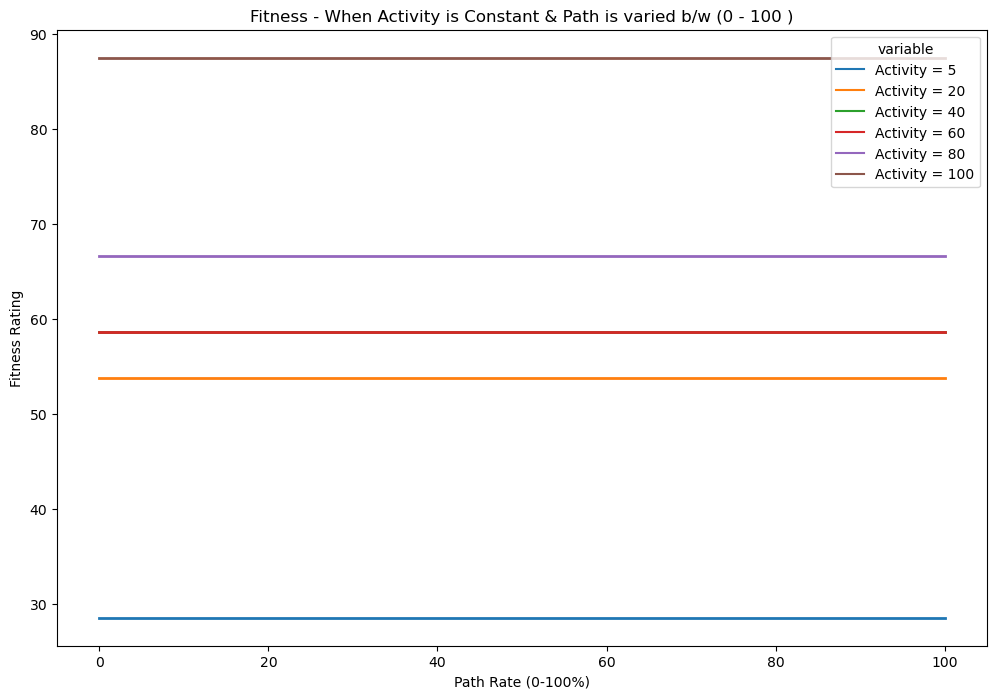

In [25]:
figure(figsize=(12, 8), dpi=100)
sns.lineplot(x='Path_Rate', y='value', hue='variable', data=pd.melt(PATH_FULL, ['Path_Rate']), lw = 2)
plt.xlabel("Path Rate (0-100%)")
plt.ylabel("Fitness Rating")
plt.title("Fitness - When Activity is Constant & Path is varied b/w (0 - 100 )")
plt.show()

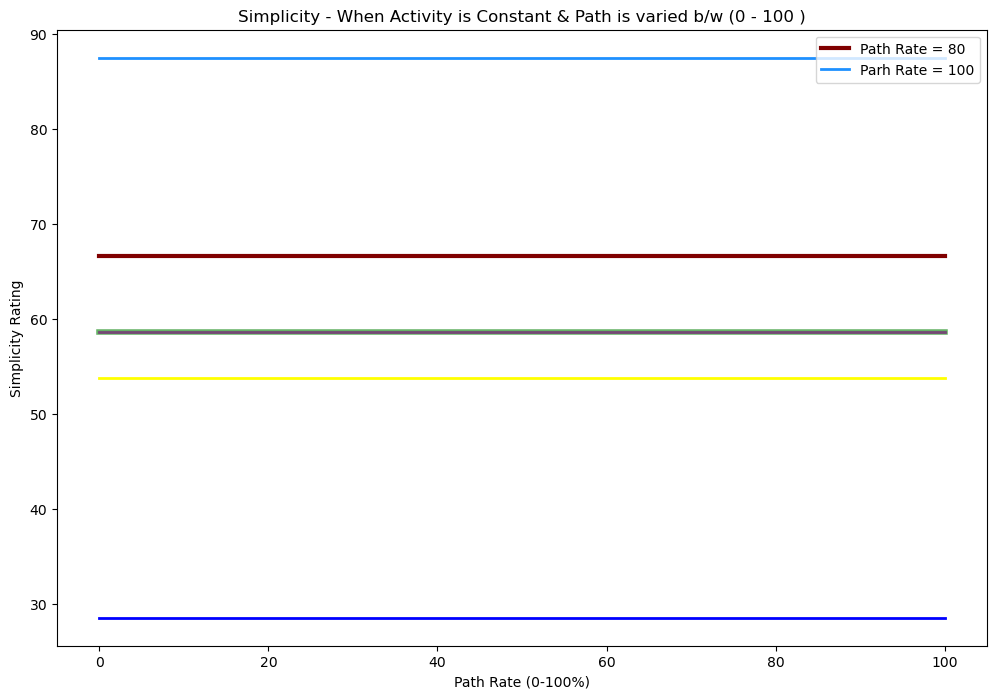

In [28]:
figure(figsize=(12, 8), dpi=100)
sns.lineplot(x='Activity_rate', y='Simplicity', data=res_SP0, lw = 2, color = 'blue')
sns.lineplot(x='Activity_rate', y='Simplicity', data=res_SP1, lw = 2, color = 'yellow')
sns.lineplot(x='Activity_rate', y='Simplicity', data=res_SP2, lw = 4, alpha = 0.6, color = 'green')
sns.lineplot(x='Activity_rate', y='Simplicity', data=res_SP3, lw = 2, alpha = 0.6, color = 'purple')
sns.lineplot(x='Activity_rate', y='Simplicity', data=res_SP4, lw = 3, label = "Path Rate = 80", color = 'maroon')
sns.lineplot(x='Activity_rate', y='Simplicity', data=res_SP5, lw = 2, label = "Parh Rate = 100", color = 'dodgerblue')
#sns.lineplot(x='Activity_Rate', y='value', hue='variable', data=pd.melt(ACT_FULL, re['Activity_Rate']), lw = 2)
plt.xlabel("Path Rate (0-100%)")
plt.ylabel("Simplicity Rating")
plt.title("Simplicity - When Activity is Constant & Path is varied b/w (0 - 100 )")
#plt.legend()
plt.show()

In [ ]:
PATH_FULL.to_csv("Sample_5_Simplicity_PATH.csv")

In [ ]:
figure(figsize=(12, 8), dpi=100)
sns.lineplot(x='Path_Rate', y='value', hue='variable', data=pd.melt(Path_FULL, ['Path_Rate']), lw = 2)
plt.xlabel("Path (0-100%)")
plt.ylabel("Fitness Rating")
plt.title("Fitness - When Activity is Path is kept Constant & Varied b/w (0 - 100 )")
plt.show()

-------------

-------------